In [ ]:
#Gọi thư viện:
import numpy as np
from keras.utils import np_utils 
from keras.datasets import cifar100 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
from keras.backend import dropout

169017344/169001437 [==============================] - 2s 0us/step


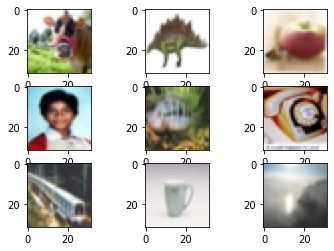

In [ ]:
# Hiển thị cifar100 và chia dữ liệu thành 2 tập train và test:
(x_train, y_train),(x_test, y_test)=cifar100.load_data()
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
# Xem kích thước tập dữ liệu train, test:
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 1)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 1)


In [ ]:
# Chuyển chiều dữ liệu 
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
# Ép kiểu dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Chuẩn hóa dữ liệu
x_train /=255
x_test /=255
# Chuyển y sang 100 class
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
# Tạo mạng nơ-ron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1000)              513000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               5

In [ ]:
# Chạy mẫu thử:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])

Epoch 1/50
313/313 [==============================] - 33s 103ms/step - loss: 3.5565 - accuracy: 0.1678 - val_loss: 3.6088 - val_accuracy: 0.1622
Epoch 2/50
313/313 [==============================] - 25s 80ms/step - loss: 3.5492 - accuracy: 0.1688 - val_loss: 3.5701 - val_accuracy: 0.1684
Epoch 3/50
313/313 [==============================] - 25s 80ms/step - loss: 3.5325 - accuracy: 0.1690 - val_loss: 3.5269 - val_accuracy: 0.1797
Epoch 4/50
313/313 [==============================] - 25s 80ms/step - loss: 3.5346 - accuracy: 0.1699 - val_loss: 3.5557 - val_accuracy: 0.1737
Epoch 5/50
313/313 [==============================] - 26s 82ms/step - loss: 3.5337 - accuracy: 0.1703 - val_loss: 3.5086 - val_accuracy: 0.1769
Epoch 6/50
313/313 [==============================] - 25s 80ms/step - loss: 3.5376 - accuracy: 0.1708 - val_loss: 3.4816 - val_accuracy: 0.1857
Epoch 7/50
313/313 [==============================] - 25s 80ms/step - loss: 3.5376 - accuracy: 0.1726 - val_loss: 3.4799 - val_accuracy

Sai số kiểm tra:  3.494243860244751
Độ chính xác kiểm tra:  0.1842000037431717


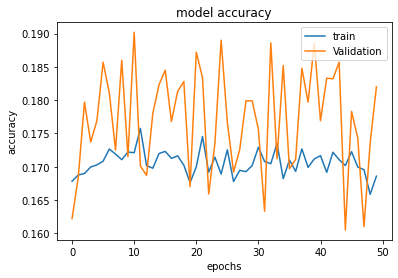

In [ ]:
# Đánh giá chất lượng mô hình và đồ thị:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra: ',score[0])
print('Độ chính xác kiểm tra: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()